In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Global Protein PCA

In [3]:
#import dataset and print first 5 rows
df = pd.read_excel('globalprotein_phosphoprotein_df.xlsx', sheet_name='GlobalProtein')
df.head()

,ID,Sample,Line,Sex,D3Z6F5,Q9QWI6,P97427,Q5SVJ1,S4R2R5,G3UYZ1,...,Q8BX10,Q8CJ40,Q3TLS3,Q8K298,A0A0R4J1Z3,P04264,P13645,Q8BR63,A0A0R4J0P5,O55026
0,127C,1111,HAP,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,427.4,2065.1,39.3,84.3,207.6,2244.4,2239.7,203.8,17.1,96.2
1,128C,6156,HAP,Female,NaN,NaN,NaN,NaN,NaN,NaN,...,403.9,2028.7,38.8,73.9,144.6,2772.5,2698.7,202.0,9.7,75.4
2,129N,6153,HAP,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,409.2,1902.2,35.3,83.2,176.6,3813.6,3788.2,148.6,13.5,77.1
3,132N,6158,HAP,Female,NaN,NaN,NaN,NaN,NaN,NaN,...,406.5,1990.3,47.5,80.6,142.1,3341.3,4961.6,271.6,8.0,50.3
4,132C,6161,HAP,Female,NaN,NaN,NaN,NaN,NaN,NaN,...,389.1,1892.3,42.0,85.3,182.0,2468.6,2680.6,185.8,9.2,68.4


In [4]:
#drop columns that have NA values
df = df.dropna(axis=1) 
df

,ID,Sample,Line,Sex,Q8BHJ6,Q8BGT1,Q80SZ7,P32848,Q8BGQ1,P50586,...,Q8BX10,Q8CJ40,Q3TLS3,Q8K298,A0A0R4J1Z3,P04264,P13645,Q8BR63,A0A0R4J0P5,O55026
0,127C,1111,HAP,Male,55.5,20.4,257.5,212.1,25.0,46.7,...,427.4,2065.1,39.3,84.3,207.6,2244.4,2239.7,203.8,17.1,96.2
1,128C,6156,HAP,Female,56.2,19.5,275.7,224.6,18.5,33.2,...,403.9,2028.7,38.8,73.9,144.6,2772.5,2698.7,202.0,9.7,75.4
2,129N,6153,HAP,Male,41.4,19.9,286.3,250.4,23.3,25.7,...,409.2,1902.2,35.3,83.2,176.6,3813.6,3788.2,148.6,13.5,77.1
3,132N,6158,HAP,Female,66.4,16.0,306.9,373.5,13.3,25.3,...,406.5,1990.3,47.5,80.6,142.1,3341.3,4961.6,271.6,8.0,50.3
4,132C,6161,HAP,Female,52.2,18.1,270.1,277.2,22.5,31.2,...,389.1,1892.3,42.0,85.3,182.0,2468.6,2680.6,185.8,9.2,68.4
5,133N,6157,HAP,Female,63.3,13.7,273.9,364.6,24.5,37.5,...,405.6,1919.2,42.1,92.7,153.0,2198.9,2012.2,232.3,8.8,82.5
6,133C,6150,HAP,Male,45.8,19.3,247.7,272.6,24.0,32.9,...,423.6,1989.1,38.5,68.7,135.5,2546.8,2855.7,191.5,7.5,96.8
7,134N,6155,HAP,Male,57.7,23.4,271.4,221.2,20.5,24.0,...,417.6,2538.4,44.7,82.7,172.9,2384.1,2582.3,164.8,15.2,79.2
8,126,6523,LAP,Male,53.6,11.8,230.8,197.1,18.0,23.6,...,440.4,2433.8,52.9,139.0,233.0,2144.9,2285.8,295.7,16.7,131.7
9,127N,6535,LAP,Female,37.9,14.5,199.1,158.6,17.4,39.7,...,567.2,2633.9,62.2,98.0,233.3,3928.6,4045.4,229.9,12.9,159.4


In [4]:
from sklearn.preprocessing import StandardScaler
x = df.iloc[:,4:3606].values
x = StandardScaler().fit_transform(x)

In [5]:
y_line = df.loc[:,['Line']].values
y_sex = df.loc[:,['Sex']].values

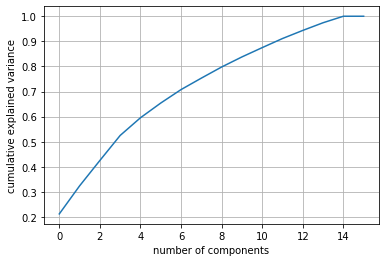

In [6]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.802587,-18.266632,23.881339,37.466683,16.478522,12.180848,-11.022161,-3.230521
1,0.789694,25.861253,-0.137976,0.759991,11.710222,0.376787,-11.738694,-2.460362
2,-24.761121,21.309721,-3.292767,-2.406291,3.983874,-21.357083,15.977043,-13.950922
3,72.067337,3.615596,21.440249,-33.069236,-18.002277,0.307613,-11.992538,-9.105729
4,-9.398949,24.755957,-0.093439,-11.857673,9.957162,-5.527310,7.896498,5.561903


In [8]:
pca.explained_variance_ratio_

array([0.2123323 , 0.11167817, 0.10126013, 0.09970567, 0.07049382,
       0.05867554, 0.05358782, 0.04565735])

In [9]:
finalDf = pd.concat([principalDf, df[['Line']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Line
0,1.802587,-18.266632,23.881339,37.466683,16.478522,12.180848,-11.022161,-3.230521,HAP
1,0.789694,25.861253,-0.137976,0.759991,11.710222,0.376787,-11.738694,-2.460362,HAP
2,-24.761121,21.309721,-3.292767,-2.406291,3.983874,-21.357083,15.977043,-13.950922,HAP
3,72.067337,3.615596,21.440249,-33.069236,-18.002277,0.307613,-11.992538,-9.105729,HAP
4,-9.398949,24.755957,-0.093439,-11.857673,9.957162,-5.527310,7.896498,5.561903,HAP
5,-9.010955,-16.043004,40.921661,-16.244701,20.832438,14.639310,18.920890,10.236117,HAP
6,-22.716732,28.914646,26.337905,7.934341,-20.674954,-17.395817,-8.867770,16.241378,HAP
7,24.228827,10.884992,-9.381228,7.189223,32.737032,-5.709707,-8.317694,-2.242668,HAP
8,-8.671188,-25.935302,-15.102809,-17.159022,-4.170940,-13.104976,14.586606,22.182914,LAP
9,-34.744178,-21.110584,13.745554,17.155600,-22.470302,0.142379,-2.790601,-11.793176,LAP


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


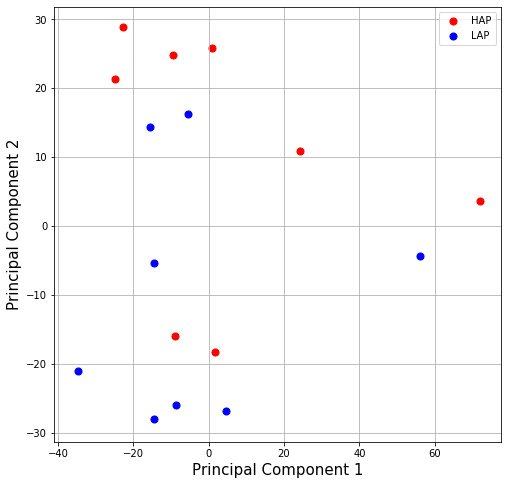

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['HAP', 'LAP']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Line'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig('HAP_LAP_PCA_GP.png', dpi=600)
plt.savefig('HAP_LAP_PCA_GP.eps')

In [11]:
finalDf = pd.concat([principalDf, df[['Sex']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Sex
0,1.802587,-18.266632,23.881339,37.466683,16.478522,12.180848,-11.022161,-3.230521,Male
1,0.789694,25.861253,-0.137976,0.759991,11.710222,0.376787,-11.738694,-2.460362,Female
2,-24.761121,21.309721,-3.292767,-2.406291,3.983874,-21.357083,15.977043,-13.950922,Male
3,72.067337,3.615596,21.440249,-33.069236,-18.002277,0.307613,-11.992538,-9.105729,Female
4,-9.398949,24.755957,-0.093439,-11.857673,9.957162,-5.527310,7.896498,5.561903,Female
5,-9.010955,-16.043004,40.921661,-16.244701,20.832438,14.639310,18.920890,10.236117,Female
6,-22.716732,28.914646,26.337905,7.934341,-20.674954,-17.395817,-8.867770,16.241378,Male
7,24.228827,10.884992,-9.381228,7.189223,32.737032,-5.709707,-8.317694,-2.242668,Male
8,-8.671188,-25.935302,-15.102809,-17.159022,-4.170940,-13.104976,14.586606,22.182914,Male
9,-34.744178,-21.110584,13.745554,17.155600,-22.470302,0.142379,-2.790601,-11.793176,Female


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


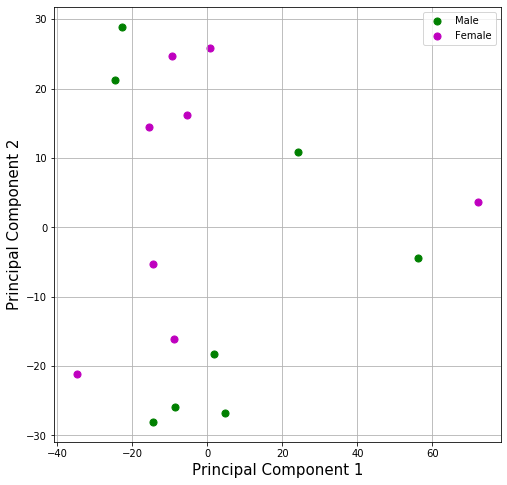

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['Male', 'Female']
colors = ['g', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Sex'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.savefig('Sex_PCA_GP.png', dpi=600)
plt.savefig('Sex_PCA_GP.eps')

In [13]:
finalDf = pd.concat([finalDf, df[['Line']]], axis = 1)
finalDf['SL'] = finalDf['Line'] + '-' + finalDf['Sex']
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Sex,Line,SL
0,1.802587,-18.266632,23.881339,37.466683,16.478522,12.180848,-11.022161,-3.230521,Male,HAP,HAP-Male
1,0.789694,25.861253,-0.137976,0.759991,11.710222,0.376787,-11.738694,-2.460362,Female,HAP,HAP-Female
2,-24.761121,21.309721,-3.292767,-2.406291,3.983874,-21.357083,15.977043,-13.950922,Male,HAP,HAP-Male
3,72.067337,3.615596,21.440249,-33.069236,-18.002277,0.307613,-11.992538,-9.105729,Female,HAP,HAP-Female
4,-9.398949,24.755957,-0.093439,-11.857673,9.957162,-5.527310,7.896498,5.561903,Female,HAP,HAP-Female
5,-9.010955,-16.043004,40.921661,-16.244701,20.832438,14.639310,18.920890,10.236117,Female,HAP,HAP-Female
6,-22.716732,28.914646,26.337905,7.934341,-20.674954,-17.395817,-8.867770,16.241378,Male,HAP,HAP-Male
7,24.228827,10.884992,-9.381228,7.189223,32.737032,-5.709707,-8.317694,-2.242668,Male,HAP,HAP-Male
8,-8.671188,-25.935302,-15.102809,-17.159022,-4.170940,-13.104976,14.586606,22.182914,Male,LAP,LAP-Male
9,-34.744178,-21.110584,13.745554,17.155600,-22.470302,0.142379,-2.790601,-11.793176,Female,LAP,LAP-Female


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


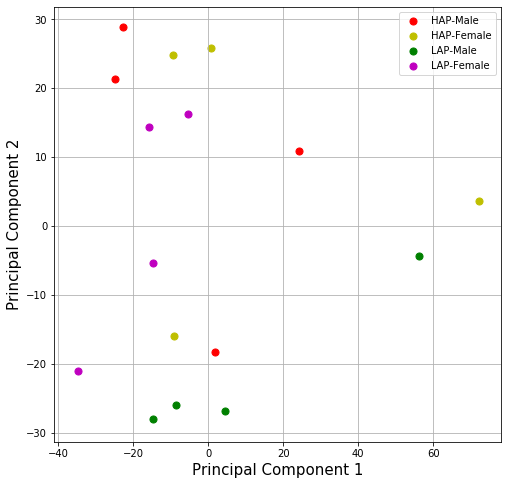

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['HAP-Male', 'HAP-Female', 'LAP-Male', 'LAP-Female']
colors = ['r', 'y', 'g', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SL'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.savefig('LinebySex_GP_PCA.png', dpi=600)
plt.savefig('LinebySex_GP_PCA.eps')

## PhosphoProtein PCAs

In [15]:
#import dataset and print first 5 rows
df = pd.read_excel('globalprotein_phosphoprotein_df.xlsx', sheet_name='PhosphoProteins')
df.head()

,ID,Sample,Line,Sex,A2ARS0,Q5FWK3,A0A0A6YW88,Q99PV8,Q99PV8.1,Q9JJZ6,...,O88737.38,E9Q0J5.6,Q5SSM3,Q8R4E6,Q8R4E6.1,O35526.8,E9PUK6.31,E0CX32.1,Q68FL4.4,Q80TR1.1
0,127C,1111,HAP,Male,NaN,34.2,70.5,64.3,117.9,NaN,...,22.4,45.9,NaN,110.3,11.3,30.2,18.0,13.7,51.9,16.2
1,128C,6156,HAP,Female,NaN,28.0,73.5,64.3,127.0,NaN,...,24.8,34.3,NaN,97.8,14.1,21.8,10.9,15.7,50.5,13.3
2,129N,6153,HAP,Male,NaN,35.4,78.3,76.5,122.0,NaN,...,16.3,33.1,NaN,104.0,14.3,30.4,23.2,9.2,42.1,14.3
3,132N,6158,HAP,Female,NaN,17.0,35.4,32.0,71.4,NaN,...,12.8,24.3,NaN,69.4,8.4,14.6,8.9,8.4,25.3,7.3
4,132C,6161,HAP,Female,NaN,29.9,59.4,75.0,127.5,NaN,...,25.6,32.9,NaN,107.1,13.0,26.2,21.4,15.2,41.4,17.6


In [16]:
#drop columns that have NA values
df = df.dropna(axis=1) 
df.head()

,ID,Sample,Line,Sex,Q5FWK3,A0A0A6YW88,Q99PV8,Q99PV8.1,P53986,Q9D1T0,...,P62996.5,O88737.38,E9Q0J5.6,Q8R4E6,Q8R4E6.1,O35526.8,E9PUK6.31,E0CX32.1,Q68FL4.4,Q80TR1.1
0,127C,1111,HAP,Male,34.2,70.5,64.3,117.9,53.8,69.6,...,37.9,22.4,45.9,110.3,11.3,30.2,18.0,13.7,51.9,16.2
1,128C,6156,HAP,Female,28.0,73.5,64.3,127.0,55.2,72.7,...,31.0,24.8,34.3,97.8,14.1,21.8,10.9,15.7,50.5,13.3
2,129N,6153,HAP,Male,35.4,78.3,76.5,122.0,53.0,69.2,...,41.0,16.3,33.1,104.0,14.3,30.4,23.2,9.2,42.1,14.3
3,132N,6158,HAP,Female,17.0,35.4,32.0,71.4,32.0,42.3,...,19.4,12.8,24.3,69.4,8.4,14.6,8.9,8.4,25.3,7.3
4,132C,6161,HAP,Female,29.9,59.4,75.0,127.5,64.4,66.2,...,24.3,25.6,32.9,107.1,13.0,26.2,21.4,15.2,41.4,17.6


In [17]:
from sklearn.preprocessing import StandardScaler
x = df.iloc[:,4:3474].values
x = StandardScaler().fit_transform(x)

In [18]:
y_line = df.loc[:,['Line']].values
y_sex = df.loc[:,['Sex']].values

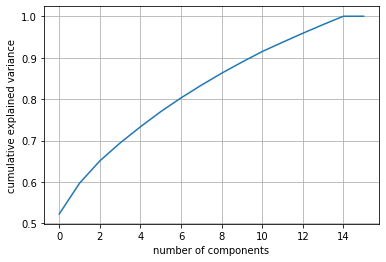

In [19]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
principalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-19.520492,-12.569160,-11.779708,4.353626,6.213270,-21.697964
1,-32.588327,-15.352833,11.812463,-10.744483,-4.301253,0.009645
2,-24.665297,-3.914131,-3.280542,-4.953265,-14.748200,0.596380
3,112.592407,-20.930314,-9.200990,-3.791901,-3.261568,9.364419
4,-19.433709,-10.418608,5.781140,-18.335852,-3.992556,-6.306093


In [21]:
pca.explained_variance_ratio_

array([0.52281089, 0.07426476, 0.05388662, 0.04324125, 0.03896712,
       0.0365629 ])

In [22]:
finalDf = pd.concat([principalDf, df[['Line']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,Line
0,-19.520492,-12.569160,-11.779708,4.353626,6.213270,-21.697964,HAP
1,-32.588327,-15.352833,11.812463,-10.744483,-4.301253,0.009645,HAP
2,-24.665297,-3.914131,-3.280542,-4.953265,-14.748200,0.596380,HAP
3,112.592407,-20.930314,-9.200990,-3.791901,-3.261568,9.364419,HAP
4,-19.433709,-10.418608,5.781140,-18.335852,-3.992556,-6.306093,HAP
5,-24.760669,-7.676972,-12.328698,-20.941366,29.768198,-2.409661,HAP
6,-44.336011,-10.116253,-17.926320,13.314417,-11.759376,5.608945,HAP
7,24.545877,-19.604900,7.047951,4.937102,-3.411821,1.806817,HAP
8,17.052470,36.780902,12.020158,-3.212724,8.912003,-9.139784,LAP
9,-47.173190,15.080434,-23.208345,15.302556,0.448481,1.772926,LAP


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


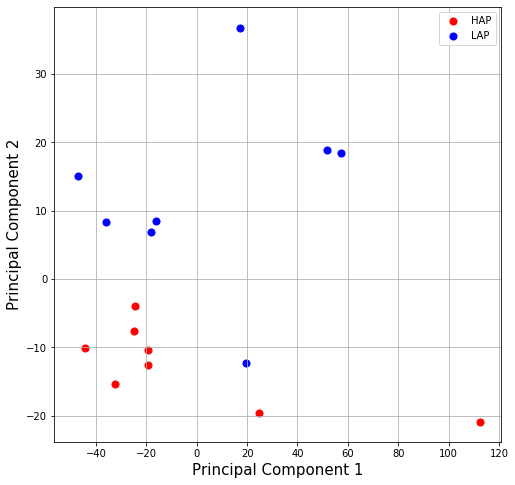

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['HAP', 'LAP']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Line'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig('HAP_LAP_PCA_PP.png', dpi=600)
plt.savefig('HAP_LAP_PCA_PP.eps')

In [24]:
finalDf = pd.concat([principalDf, df[['Sex']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,Sex
0,-19.520492,-12.569160,-11.779708,4.353626,6.213270,-21.697964,Male
1,-32.588327,-15.352833,11.812463,-10.744483,-4.301253,0.009645,Female
2,-24.665297,-3.914131,-3.280542,-4.953265,-14.748200,0.596380,Male
3,112.592407,-20.930314,-9.200990,-3.791901,-3.261568,9.364419,Female
4,-19.433709,-10.418608,5.781140,-18.335852,-3.992556,-6.306093,Female
5,-24.760669,-7.676972,-12.328698,-20.941366,29.768198,-2.409661,Female
6,-44.336011,-10.116253,-17.926320,13.314417,-11.759376,5.608945,Male
7,24.545877,-19.604900,7.047951,4.937102,-3.411821,1.806817,Male
8,17.052470,36.780902,12.020158,-3.212724,8.912003,-9.139784,Male
9,-47.173190,15.080434,-23.208345,15.302556,0.448481,1.772926,Female


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


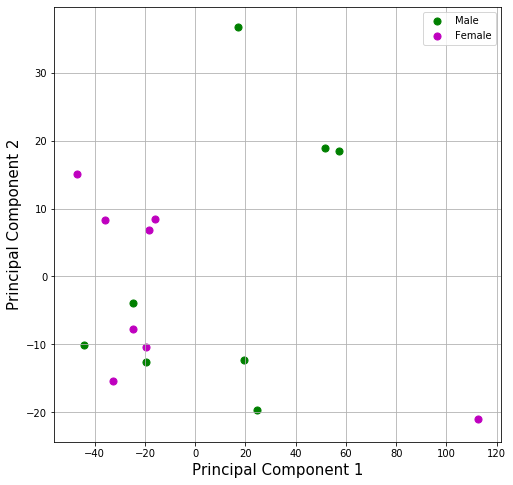

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['Male', 'Female']
colors = ['g', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Sex'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.savefig('Sex_PCA_PP.png', dpi=600)
plt.savefig('Sex_PCA_PP.eps')

In [26]:
finalDf = pd.concat([finalDf, df[['Line']]], axis = 1)
finalDf['SL'] = finalDf['Line'] + '-' + finalDf['Sex']
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,Sex,Line,SL
0,-19.520492,-12.569160,-11.779708,4.353626,6.213270,-21.697964,Male,HAP,HAP-Male
1,-32.588327,-15.352833,11.812463,-10.744483,-4.301253,0.009645,Female,HAP,HAP-Female
2,-24.665297,-3.914131,-3.280542,-4.953265,-14.748200,0.596380,Male,HAP,HAP-Male
3,112.592407,-20.930314,-9.200990,-3.791901,-3.261568,9.364419,Female,HAP,HAP-Female
4,-19.433709,-10.418608,5.781140,-18.335852,-3.992556,-6.306093,Female,HAP,HAP-Female
5,-24.760669,-7.676972,-12.328698,-20.941366,29.768198,-2.409661,Female,HAP,HAP-Female
6,-44.336011,-10.116253,-17.926320,13.314417,-11.759376,5.608945,Male,HAP,HAP-Male
7,24.545877,-19.604900,7.047951,4.937102,-3.411821,1.806817,Male,HAP,HAP-Male
8,17.052470,36.780902,12.020158,-3.212724,8.912003,-9.139784,Male,LAP,LAP-Male
9,-47.173190,15.080434,-23.208345,15.302556,0.448481,1.772926,Female,LAP,LAP-Female


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


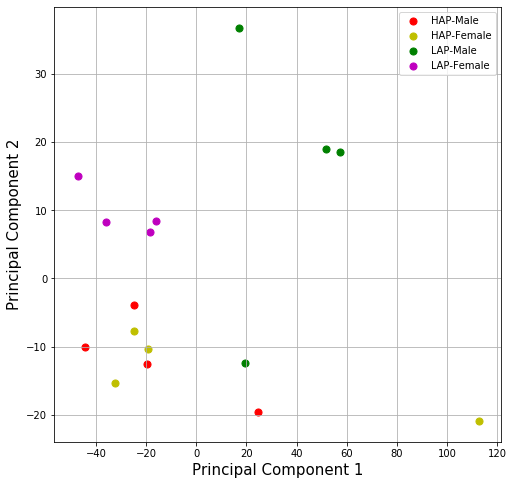

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ['HAP-Male', 'HAP-Female', 'LAP-Male', 'LAP-Female']
colors = ['r', 'y', 'g', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SL'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.savefig('LinebySex_PP_PCA.png', dpi=600)
plt.savefig('LinebySex_PP_PCA.eps')